In [57]:
#Loading Data

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
import pandas as pd
import numpy as np
wine = pd.read_csv('wine.csv')
print("Dataset shape:", wine.shape)

Dataset shape: (178, 14)


In [21]:
#Data preprocessing
print("Missing values per column:\n", wine.isnull().sum())
print(wine.describe().T[['mean','std','min','25%','50%','75%','max']])

Missing values per column:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64
                       mean         std     min       25%      50%       75%  \
Type               1.938202    0.775035    1.00    1.0000    2.000    3.0000   
Alcohol           13.000618    0.811827   11.03   12.3625   13.050   13.6775   
Malic              2.336348    1.117146    0.74    1.6025    1.865    3.0825   
Ash                2.366517    0.274344    1.36    2.2100    2.360    2.5575   
Alcalinity        19.494944    3.339564   10.60   17.2000   19.500   21.5000   
Magnesium         99.741573   14.282484   70.00   88.0000   98.000  107.0000   
Phenols            2.295112    0.625851    0.98    1.7425    2.355    2.8000   
Flavanoids         2.0292

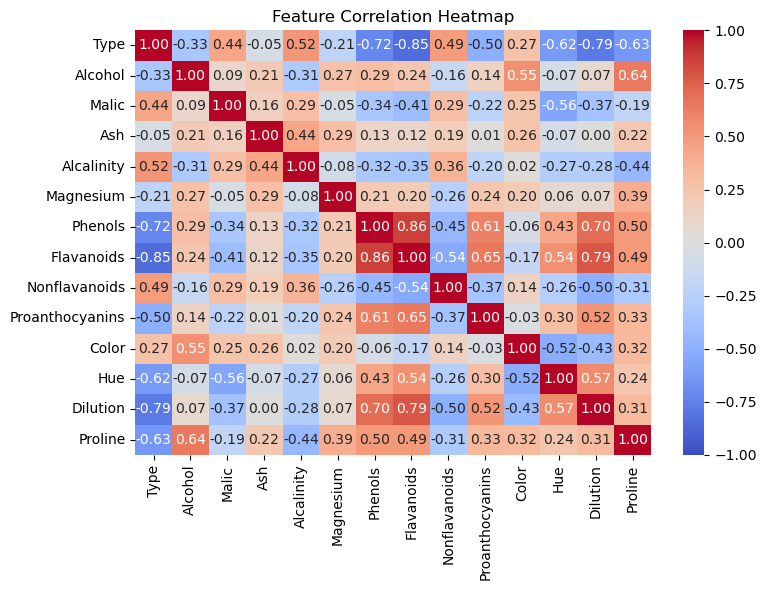

In [60]:
#understanding the hidden patterns in the dataset
#EDA


import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
corr = wine.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = wine.drop('Type', axis=1).values
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)
print("Explained variance ratio (3 PCs):", pca.explained_variance_ratio_)
print("Cumulative variance (3 PCs):", pca.explained_variance_ratio_.sum())


Explained variance ratio (3 PCs): [0.36198848 0.1920749  0.11123631]
Cumulative variance (3 PCs): 0.6652996889318525


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

scores = []
labels
sil2 = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42).fit(X_std)
    labels = km.labels_
    sil = silhouette_score(X_std, labels)
    sil2.append(sil)
    db = davies_bouldin_score(X_std, labels)
    scores.append((k, sil, db))
    print(f"k={k}: silhouette={sil:.3f}, DB={db:.3f}")

sil = max(sil2)


k=2: silhouette=0.265, DB=1.494
k=3: silhouette=0.285, DB=1.389
k=4: silhouette=0.254, DB=1.695
k=5: silhouette=0.184, DB=1.912
k=6: silhouette=0.169, DB=1.931
k=7: silhouette=0.173, DB=1.702
k=8: silhouette=0.163, DB=1.844
k=9: silhouette=0.174, DB=1.643
k=10: silhouette=0.140, DB=1.719


In [54]:
scores_pca = []
labels_pca
sil_score = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42).fit(X_pca)
    labels_pca = km.labels_
    sil = silhouette_score(X_pca, labels_pca)
    sil_score.append(sil)
    db = davies_bouldin_score(X_pca, labels_pca)
    scores_pca.append((k, sil, db))
    print(f"k={k}: silhouette={sil:.3f}, DB={db:.3f}")

sil_pca = max(sil_score)


k=2: silhouette=0.400, DB=0.998
k=3: silhouette=0.454, DB=0.839
k=4: silhouette=0.407, DB=1.036
k=5: silhouette=0.348, DB=1.104
k=6: silhouette=0.308, DB=1.139
k=7: silhouette=0.299, DB=1.130
k=8: silhouette=0.278, DB=1.129
k=9: silhouette=0.290, DB=1.057
k=10: silhouette=0.299, DB=0.998


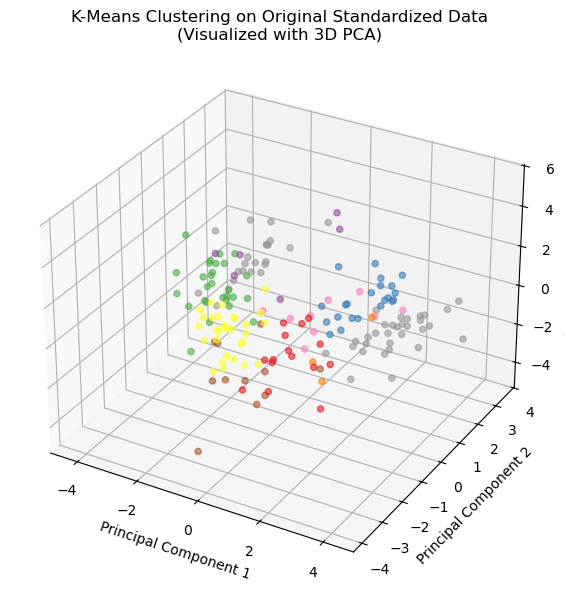

In [46]:
# Plotting
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
axs = fig.add_subplot(111, projection='3d')

# Plot for KMeans on original data
axs.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:,2], c=labels, cmap='Set1',alpha=0.6)
axs.set_title("K-Means Clustering on Original Standardized Data\n(Visualized with 3D PCA)")
axs.set_xlabel("Principal Component 1")
axs.set_ylabel("Principal Component 2")
axs.set_zlabel("Principal Component 3")


plt.show()

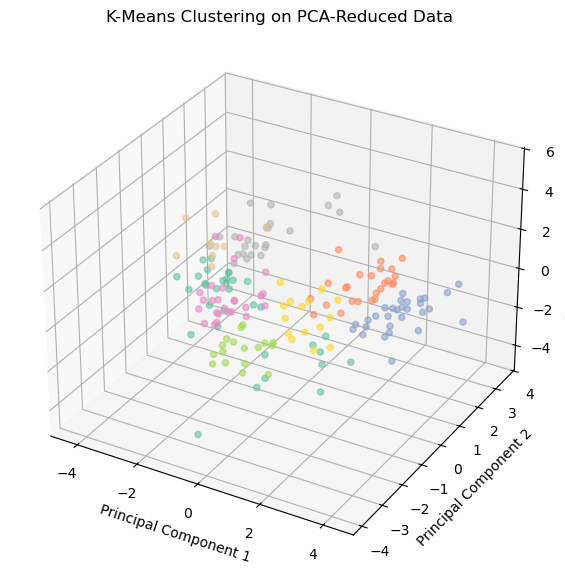

In [48]:
# Plot for KMeans on PCA data
fig = plt.figure(figsize=(10, 7))
axs = fig.add_subplot(111, projection='3d')
axs.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:,2], c=labels_pca, cmap='Set2',alpha=0.6)
axs.set_title("K-Means Clustering on PCA-Reduced Data")
axs.set_xlabel("Principal Component 1")
axs.set_ylabel("Principal Component 2")
axs.set_zlabel("Principal Component 3")

plt.show()

In [58]:
#K-Means Clustering on PCA-Reduced Data VS K-Means Clustering on Original Data
print("Silhoutte Score of K-means on Original data", np.round(sil,2))
print("Silhoutte Score of K-means on PCA Reduced data", np.round(sil_pca,2))


Silhoutte Score of K-means on Original data 0.28
Silhoutte Score of K-means on PCA Reduced data 0.45


In [59]:
#Comparison and Analysis
#EDA revealed a clean dataset with no missing values and highlighted feature distributions and correlations.
#PCA reduced the 13-dimensional data to 3 principal components (capturing ~66% of variance) for visualization.
#Clustering with K-Means on both the original and PCA-reduced data consistently yielded 3 clusters.
#PCA improved cluster performance by focusing on dominant structure.


#Both approaches (original vs PCA data) identify 3 clusters as optimal.
#This matches the three wine types. In fact, the cluster labels correspond closely between methods.
#However, applying PCA before clustering gives better metrics: higher silhouette and lower DB.

#Practical practical implications of using PCA and clustering in data analysis.
# PCA is valuable when dealing with high-dimensional or highly correlated data, as it can speed up algorithms and mitigate noise. 
#Separation: In PCA 3D Space, clusters are tighter and more separated, as seen by higher silhouette (>0.45) vs original (~0.28).


#Use PCA before clustering when data dimensionality is high and interpretability of individual features is less critical
